In [ ]:
import sys
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import seaborn as sns
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)'

In [2]:
payments = pd.read_csv("C:/Users/16476/Documents/Courses/CIND_820_Project/archive_Online_Payments_Fraud_detection_datasets/PS_20174392719_1491204439457_log.csv")

In [3]:
payments.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
f"dataset have {payments.shape[0]} rows and {payments.shape[1]} features."

'dataset have 6362620 rows and 11 features.'

In [35]:
pd.DataFrame(zip(payments.columns,
                 payments.isna().any(),
                (payments.isna().sum() / payments.shape[0]) * 100),
             columns=['Column', 'Has Missing Values?', '% Missing Values'])\
    .sort_values('% Missing Values', ascending=False)

,Column,Has Missing Values?,% Missing Values
0,step,False,0.0
1,type,False,0.0
2,amount,False,0.0
3,nameOrig,False,0.0
4,oldbalanceOrg,False,0.0
5,newbalanceOrig,False,0.0
6,nameDest,False,0.0
7,oldbalanceDest,False,0.0
8,newbalanceDest,False,0.0
9,isFraud,False,0.0


In [23]:
payments.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,TransferAmountOrg,TransferAmountDest
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06,-2.123056e+04,1.242947e+05
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03,1.466433e+05,8.129391e+05
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.915268e+06,-1.306083e+07
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00,1.015044e+04,1.491054e+05
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00,1.000000e+07,1.056878e+08


In [45]:
del payments["isFlaggedFraud"]

Text(0.5, 1, 'Pearson correlation of Features')


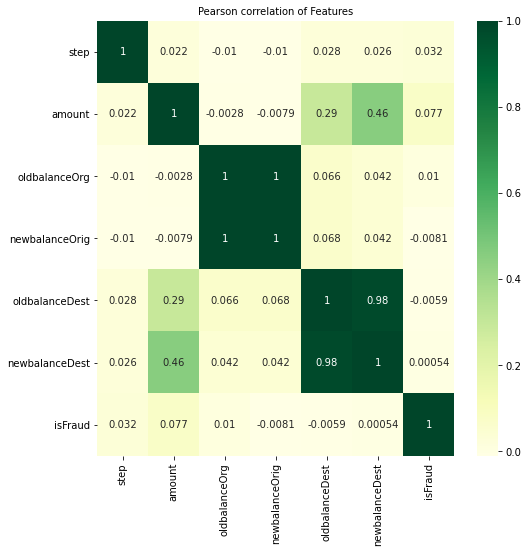

In [46]:
corr = payments.corr()

f, ax = plt.subplots(figsize=(8,8))
cmap = sns.diverging_palette(220, 10,  as_cmap=True)
_ = sns.heatmap(corr, cmap="YlGn", ax=ax, annot=True)

print(plt.title("Pearson correlation of Features", y=1, size=10))

plt.show()

C:\Users\16476\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


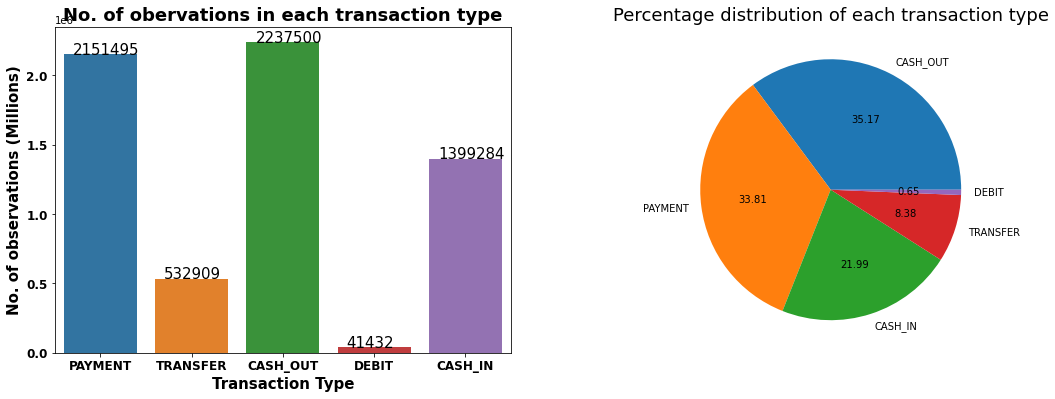

In [38]:
# transaction type
plt.subplots(1,2, figsize=(18,6))

# countplot to visualize the no. of observations under each class
plt.subplot(1,2,1)
ax = sns.countplot(payments['type'])
plt.xlabel('Transaction Type', fontsize=15, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.ylabel('No. of observations (Millions)', fontsize=15, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.title('No. of obervations in each transaction type', fontsize=18, fontweight='bold')
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.1, i.get_height(), str(round(i.get_height(), 2)), fontsize=15, color='black')

# pie chart to visualize the percentage distribution of each class
plt.subplot(1,2,2)
plt.pie(payments['type'].value_counts(), labels=['CASH_OUT','PAYMENT','CASH_IN','TRANSFER','DEBIT'], autopct='%.2f')
plt.title('Percentage distribution of each transaction type', fontsize=18)

# display plot
plt.show()

In [36]:
# transaction type
payments['transactionBetween'] = payments['nameDest'].apply(lambda x: 'Customer2Customer' if x[0] == "C" else 'Customer2Merchant')

In [ ]:
payments.boxplot(figsize=(20,10))

In [68]:
def categorise_org(row):  
    if row['TransferAmountOrg'] == row['amount'] :
        return 'Yes'
    return 'No'

def categorise_dest(row):  
    if row['TransferAmountDest'] == row['amount'] :
        return 'Yes'
    return 'No'

In [76]:
payments['errorBalanceOrig'] = payments['newbalanceOrig'] + payments['amount'] - payments['oldbalanceOrg']

payments['errorBalanceDest'] = payments['oldbalanceDest'] + payments['amount'] - payments['newbalanceDest']

#oldbalanceOrg	newbalanceOrig	oldbalanceDest	newbalanceDest

In [ ]:
payments['errorBalanceOrig_flag'] = payments['errorBalanceOrig'].apply(lambda x: 1 if x == 0 else 0)

payments['errorBalanceDest_flag'] = payments['errorBalanceDest'].apply(lambda x: 1 if x == 0 else 0)


In [96]:
df = pd.DataFrame(payments, columns = ['errorBalanceOrig_flag','errorBalanceDest_flag'])

In [124]:
df['flag'].value_counts()

0    6191534
1     171086
Name: flag, dtype: int64

In [120]:
def flag(errorBalanceOrig_flag,errorBalanceDest_flag):
    if errorBalanceOrig_flag == 1 & errorBalanceDest_flag == 1:
        return 1
    return 0

In [121]:
#print(payments['errorBalanceDest_flag'].value_counts())
df['flag'] = df[["errorBalanceOrig_flag", "errorBalanceDest_flag"]].apply(lambda x : flag(*x), axis=1)
#df['flag'] = df.apply(lambda x: flag(x['errorBalanceOrig_flag'], x['errorBalanceDest_flag']))

In [80]:
payments['zeroBalanceDest'] = payments['oldbalanceDest'] + payments['newbalanceDest']
payments['zeroBalanceDest'] = payments['zeroBalanceDest'].apply(lambda x: 1 if x == 0 else 0)

In [117]:
payments.head(50)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,transactionBetween,transactionHour,errorBalanceOrig,errorBalanceDest,zeroBalanceDest,errorBalanceOrig_flag,errorBalanceDest_flag
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0,Customer2Merchant,1,0.00,9839.64,1,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0,Customer2Merchant,1,0.00,1864.28,1,1,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0,Customer2Customer,1,0.00,181.00,1,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0,Customer2Customer,1,0.00,21363.00,0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0,Customer2Merchant,1,0.00,11668.14,1,1,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0,Customer2Merchant,1,0.00,7817.71,1,1,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0,Customer2Merchant,1,0.00,7107.77,1,1,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0,Customer2Merchant,1,0.00,7861.64,1,1,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0,Customer2Merchant,1,1353.36,4024.36,1,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0,Customer2Customer,1,0.00,6886.98,0,1,0


In [64]:
# transaction hour
payments['transactionHour'] = payments['step'] % 24
# converting into object type
payments['transactionHour'] = payments['transactionHour'].astype('object')


30.958333333333332


In [115]:
print(payments['transactionHour'].unique())

[1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 0]


In [73]:

del payments['TransferAmountOrg_match']
#del payments['TransferAmountOrg']

KeyError: 'TransferAmountOrg_match'

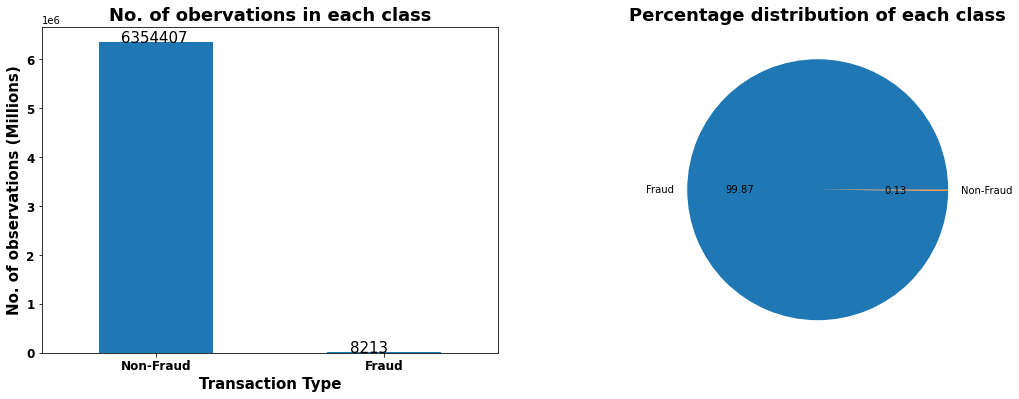

In [41]:
#fraudulent transactions
plt.subplots(1,2, figsize=(18,6))

# countplot to visualize the no. of observations under each class
plt.subplot(1,2,1)
ax = payments['isFraud'].value_counts().plot(kind='bar')
plt.xlabel('Transaction Type', fontsize=15, fontweight='bold')
plt.xticks(ticks=[0,1], labels=['Non-Fraud','Fraud'], rotation=0, fontsize=12, fontweight='bold')
plt.ylabel('No. of observations (Millions)', fontsize=15, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.title('No. of obervations in each class', fontsize=18, fontweight='bold')
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.1, i.get_height()+3, str(round(i.get_height(), 2)), fontsize=15, color='black')

# pie chart to visualize the percentage distribution of each class
plt.subplot(1,2,2)
plt.pie(payments['isFraud'].value_counts(), labels=['Fraud','Non-Fraud'], autopct='%.2f')
plt.title('Percentage distribution of each class', fontsize=18, fontweight='bold')

# display plot
plt.show()